Head of raw dataset:
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Co

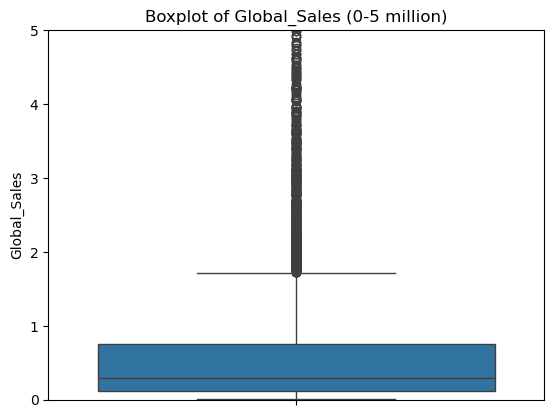

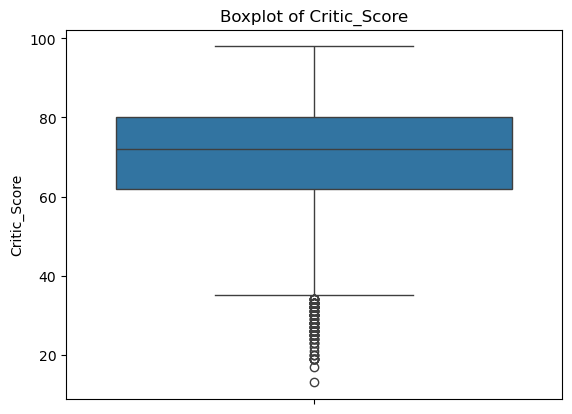

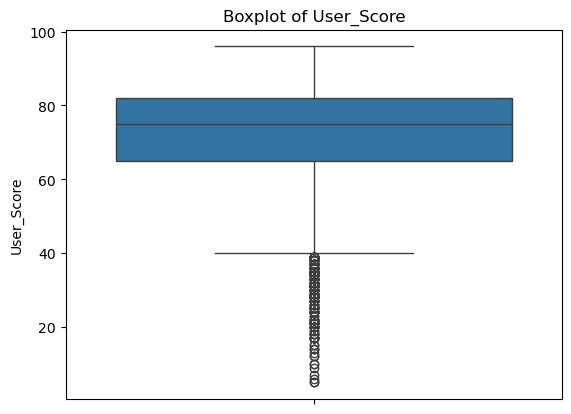

Duplicate Rows: 0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/seamusgsullivan/Video-Game-Ratings-Sales-and-Genre-Analysis/main/data/raw/Video_Games_Sales_as_at_22_Dec_2016.csv")
print(f"Head of raw dataset:\n{df.head()}\n")
print(f"Raw dataset rows: {len(df)}\n")

# Finding initial missing data percents
missing_percent_initial = (df.isnull().mean() * 100).round(2)
print(f"Initial missing data percents:\n{missing_percent_initial}\n")

# Initial cleaning
cleaned_df_initial = df.dropna(subset=['Global_Sales', 'Genre', 'Critic_Score', 'User_Score']).copy()
print(f"Initial cleaned dataset rows: {len(cleaned_df_initial)}\n")

# Fixing User_Score issue - converting it to numeric and converting 'tbd' entries in User_Score to NaN (null) for cleaning
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Final cleaning - make sure to only run once!
cleaned_df = df.dropna(subset=['Global_Sales', 'Genre', 'Critic_Score', 'User_Score']).copy()
cleaned_df['User_Score'] = cleaned_df['User_Score'] * 10
print(f"Final cleaned dataset rows: {len(cleaned_df)}\n")

# Finding updated missing data percents
missing_percent_updated = (df.isnull().mean() * 100).round(2)
print(f"Updated missing data percents:\n{missing_percent_updated}")

# Boxplots to show spread of key numeric variables
key_numeric_vars = ['Global_Sales', 'Critic_Score', 'User_Score']
for var in key_numeric_vars:
    sns.boxplot(y=cleaned_df[var])
    if var == 'Global_Sales':
        # Zooming in to find spread of most games (Global_Sales is in millions of units)
        plt.ylim(0, 5)
        plt.title("Boxplot of Global_Sales (0-5 million)")
    else:
        plt.title(f"Boxplot of {var}")
    plt.show()

# Finding duplicates
duplicate_count = cleaned_df.duplicated().sum()
print("Duplicate Rows:", duplicate_count)

# Used to export the cleaned dataset. Mostly just for reference. Run once if you need to regenerate the cleaned dataset locally.
# cleaned_df.to_csv("data/processed/Cleaned_Video_Games_Sales_as_at_22_Dec_2016.csv", index=False)